# Oblig 1 - Sanders

In [1]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np

import geneticAlgorithm as ga
import exhaustiveSearch as es
import hill
import data


My cities are mapped to a list of ints, to make it easier. Under is the mapping shown.

In [2]:
df = data.data(data.path_to_datafile)
representation = data.get_representation(df)
cities = df.columns
# [0, 1, 9, 4, 5, 2, 6, 8, 3, 7]
for city, city_int in zip(cities, representation):
    print(f" City: {city} = {city_int} ")

 City: Barcelona = 0 
 City: Belgrade = 1 
 City: Berlin = 2 
 City: Brussels = 3 
 City: Bucharest = 4 
 City: Budapest = 5 
 City: Copenhagen = 6 
 City: Dublin = 7 
 City: Hamburg = 8 
 City: Istanbul = 9 
 City: Kiev = 10 
 City: London = 11 
 City: Madrid = 12 
 City: Milan = 13 
 City: Moscow = 14 
 City: Munich = 15 
 City: Paris = 16 
 City: Prague = 17 
 City: Rome = 18 
 City: Saint Petersburg = 19 
 City: Sofia = 20 
 City: Stockholm = 21 
 City: Vienna = 22 
 City: Warsaw = 23 



## Exhaustive Search


In [3]:
es_time_data = {} # For timing each iteration
exhaustive_search_data = {} # For staring the best paths and socres
for i in range(2,11): # iterating trough subset sizes
    start_time = time.time()
    bestPath, bestScore = es.exhaustiveSearch(i) # Running algorithm
    end_time = time.time()
    # Storing data
    exhaustive_search_data[i] = (bestScore, bestPath)
    es_time_data[i] = end_time - start_time


In [4]:
for key in es_time_data:
    print(f"#Cities: {key}\n  time: {es_time_data[key]}, \n  Score:  {exhaustive_search_data[key][0]},\n  Path: {exhaustive_search_data[key][1]}")

#Cities: 2
  time: 0.007389068603515625, 
  Score:  3056.26,
  Path: [0, 1]
#Cities: 3
  time: 0.0030007362365722656, 
  Score:  4024.99,
  Path: [0, 1, 2]
#Cities: 4
  time: 0.002092123031616211, 
  Score:  4241.89,
  Path: [0, 1, 2, 3]
#Cities: 5
  time: 0.0, 
  Score:  4983.38,
  Path: [0, 1, 4, 2, 3]
#Cities: 6
  time: 0.01593637466430664, 
  Score:  5018.8099999999995,
  Path: [0, 1, 4, 5, 2, 3]
#Cities: 7
  time: 0.051158905029296875, 
  Score:  5487.89,
  Path: [0, 1, 4, 5, 2, 6, 3]
#Cities: 8
  time: 0.38487792015075684, 
  Score:  6667.49,
  Path: [0, 1, 4, 5, 2, 6, 3, 7]
#Cities: 9
  time: 3.308502674102783, 
  Score:  6678.55,
  Path: [0, 1, 4, 5, 2, 6, 8, 3, 7]
#Cities: 10
  time: 33.172536849975586, 
  Score:  7486.3099999999995,
  Path: [0, 1, 9, 4, 5, 2, 6, 8, 3, 7]



We see that for each city we add the time is increased by a substantial amount. From 9 to 10 it is aprox. a factor of 10. But we know gereraly in parmutation problems the increase of complexity is N!.

To calculate a rough estimate of time for 24 cities, we can take the time 10 cities take and multiply it with the facotr 24! / 10!. Wich means 24 cities takes aprox. 31 * 24! / 10! seconds.

In [5]:
years = ((math.factorial(24)/math.factorial(10))*es_time_data[10])/60/60/24/365.25
print(years)

179728667880.4142


So that is not going to work.

## Hill Climbing


In [6]:
# Hill Climbing
bestScore, worstScore = -1, -1
numCities_list = list(range(2,11)) + [24]
runs = 20
hill_scores = {}
bestScores =  {}
worstScores =  {}
sdScores =  {}
times_run =  {}
means = {}

for numCities in  numCities_list:
    scores = []
    times = []
    for _ in range(runs):

        data_subset = data.data_subset(data.path_to_datafile, numCities)
        start_time = time.time()
        path, score = hill.hill(data_subset, 1000)
        end_time = time.time()

        scores.append(score)
        times.append(end_time - start_time)

    # Best
    bestScores[numCities] = min(scores)
    # Worst
    worstScores[numCities] = max(scores)
    # Mean
    # ip.embed()
    mean = sum(scores) / len(scores)
    means[numCities] = mean
    # Sd
    s = 0
    for score in scores:
        s += (score - mean)**2
    s = (s/len(scores))**(1/2)
    sdScores[numCities] = s
    # Time
    mean_time = sum(times) / len(times)
    times_run[numCities] =  mean_time

# Report
for numCities in numCities_list:
    print(
        f"numCities: {numCities}\n" +
        f"  Best: {bestScores[numCities]},\n" +
        f"  Worst: {worstScores[numCities]}, \n" +
        f"  SD: {sdScores[numCities]}, \n" +
        f"  time: {times_run[numCities]}"
    )

numCities: 2
  Best: 3056.26,
  Worst: 3056.26, 
  SD: 9.094947017729282e-13, 
  time: 0.02123422622680664
numCities: 3
  Best: 4024.99,
  Worst: 4024.99, 
  SD: 4.547473508864641e-13, 
  time: 0.03040180206298828
numCities: 4
  Best: 4241.89,
  Worst: 4241.89, 
  SD: 0.0, 
  time: 0.03973288536071777
numCities: 5
  Best: 4983.38,
  Worst: 5776.78, 
  SD: 229.13615651834587, 
  time: 0.048692739009857176
numCities: 6
  Best: 5018.8099999999995,
  Worst: 6107.72, 
  SD: 344.6748576789435, 
  time: 0.05705734491348267
numCities: 7
  Best: 5487.89,
  Worst: 7167.74, 
  SD: 415.5250063507005, 
  time: 0.06733838319778443
numCities: 8
  Best: 7082.219999999999,
  Worst: 8921.189999999999, 
  SD: 524.4511249132275, 
  time: 0.0767057180404663
numCities: 9
  Best: 7539.180000000001,
  Worst: 9985.86, 
  SD: 578.7263467086581, 
  time: 0.08658030033111572
numCities: 10
  Best: 8597.86,
  Worst: 11309.64, 
  SD: 690.3060079240219, 
  time: 0.09535678625106811
numCities: 24
  Best: 24263.2099999

## Genetic Algorithm
I have chosen to use inversion mutation and pmx for crossover, and with the subset sizes 6, 10, 24.

In [7]:
# Genetic algorithm
print("Genetic Algorithm")
numCities_list = [6,10, 24]
runs = 20
iterations = 1000 # If you want ot run recomened to ether recude iterations or pop size
mutation_prob = 0.05
pop_size = 40
hill_scores = {}
bestScores =  {}
worstScores =  {}
sdScores =  {}
times_run =  {}
means = {}
average_scores_run = {}

# r = ga.geneticAlgorithm(
#     10,
#     10000,
#     10,
#     0.05,
#     debug=False
# )

for numCities in  numCities_list:
    local_min_scores = []
    scores = []
    times = []
    for _ in range(runs):
        data_subset = data.data_subset(data.path_to_datafile, numCities)
        start_time = time.time()
        r = ga.geneticAlgorithm(
                                    pop_size,
                                    iterations,
                                    numCities,
                                    mutation_prob,
                                    debug=False
                                )
        score = r["bestScore"]
        path = r["bestPath"]
        minScores =r["minScores"]

        end_time = time.time()

        scores.append(score)
        times.append(end_time - start_time)
        local_min_scores.append(minScores)

    tmp_averageScores = []
    # ip.embed()
    try:
        for element in zip(*local_min_scores):
            tmp_averageScores.append(
                sum(element) / len(element)
            )
    except TypeError:
        ip.embed()

    average_scores_run[numCities] = tmp_averageScores


    # Best
    bestScores[numCities] = min(scores)
    # Worst
    worstScores[numCities] = max(scores)
    # Mean
    mean = sum(scores) / len(scores)
    means[numCities] = mean
    # Sd
    s = 0
    for score in scores:
        s += (score - mean)**2
    s = (s/len(scores))**(1/2)
    sdScores[numCities] = s
    # Time
    mean_time = sum(times) / len(times)
    times_run[numCities] =  mean_time
    # minScores


for numCities in numCities_list:
    print(
        f"numCities: {numCities}\n" +
        f"  Best: {bestScores[numCities]},\n" +
        f"  Worst: {worstScores[numCities]}, \n" +
        f"  SD: {sdScores[numCities]},\n" +
        f"  Time: {times_run[numCities]}"
    )




Genetic Algorithm
numCities: 6
  Best: 5018.8099999999995,
  Worst: 5018.8099999999995, 
  SD: 9.094947017729282e-13,
  Time: 4.352268588542938
numCities: 10
  Best: 7486.3099999999995,
  Worst: 8346.939999999999, 
  SD: 361.78525613234945,
  Time: 5.863660609722137
numCities: 24
  Best: 12975.329999999996,
  Worst: 16339.240000000002, 
  SD: 798.3478363337324,
  Time: 10.809282469749451


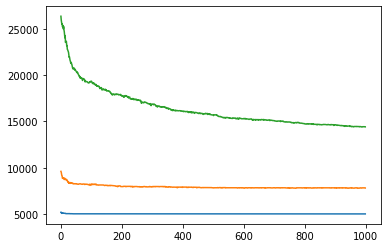

numCities: 6
  Best: 5018.8099999999995,
  Worst: 5018.8099999999995, 
  SD: 9.094947017729282e-13,
  Time: 4.352268588542938
numCities: 10
  Best: 7486.3099999999995,
  Worst: 8346.939999999999, 
  SD: 361.78525613234945,
  Time: 5.863660609722137
numCities: 24
  Best: 12975.329999999996,
  Worst: 16339.240000000002, 
  SD: 798.3478363337324,
  Time: 10.809282469749451


In [8]:
# ip.embed()
fig = plt.figure()
x = np.arange(iterations)
for numCities in numCities_list:
    y = average_scores_run[numCities]
    plt.plot(x, y)
plt.show()

for numCities in numCities_list:
    print(
        f"numCities: {numCities}\n" +
        f"  Best: {bestScores[numCities]},\n" +
        f"  Worst: {worstScores[numCities]}, \n" +
        f"  SD: {sdScores[numCities]},\n" +
        f"  Time: {times_run[numCities]}"
    )

The time for my genetic algorithm is to high for 6, but for simplisity i am running the same iterations and pop size for all of the subsets.
The genetic algorithm did find the best city, but withot a seed it might not be easily reproducible. 
Time for GA id 11 seconds on average. Time for exhaustive search was 31 seconds. and for 24 cities my algrothm will not finish this millenia, if my calculation is right. 